# Analysis of Song Popularity: What Makes a Song Popular?

# Goal for this Notebook:

Use analysis tools provided in Python to interpret the different musical characteristics from songs in Spotify database and how these characteristics influence the popularity factor associated with the song. We also reviewed songs on the Billboard Hot 100 list to compare to the data in the Spotify database. 

Data Handling
    Importing Data with Pandas
    Cleaning Data
    Exploring Data through Visualizations with Matplotlib
    
 Data Analysis
     Regression Models

# Motivation & Summary

For this project we decided to investigate a song’s popularity and if/how there are defining characteristics that make a particular song more popular than another.  

Our initial hypothesis is particular musical characteristics are direct correlators with a song’s popularity and based on these connections we can devise a prediction model to predict whether or not a song is popular.

In order to build our model we needed to analyze a population of songs and their musical characteristics. Where would 
we find a dataset that contained this info?

We discovered a dataset on Kaggle that contains 232,725 tracks pulled from Spotify’s music database via the Spotify API. The songs come from 26 different genres and the dataset also provided 14 different explanatory variables based on the song’s musical characteristics 

We did use the “popularity” variable in the dataset as our targeted dependent variable.

After exploring and running statistical models based on the data provided in the Spotify dataset, we were unable to find direct correlations between the inputs of the explanatory variables and the out of the song’s popularity. There was no significant correlation between any of the musical characteristics and the popularity variable. 

Therefore, we decided to move a different direction and conduct a couple different experiments help us define a model for measuring/predicting popularity among songs.

# Questions & Data

The main questions we focused on were “what are the measurable characteristics of a song that we can use to help explain the popularity”?

As mentioned earlier, we did discover the dataset built from the Spotify API that contained the very explanatory variables we believed would tell the story of song popularity. The Spotify API is a public resource for developers to use to mine through Spotify’s music library. The library is built of the song info such as artist name, genre and track name but also contains the data on the song’s musical characteristics. The Spotify API defines the features as the following:
    
    Key: Estimate of what key the song is in
    
    Mode: Estimate of what the mode of the song is in
    
    Instrumentalness: This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.
    
    Acousticness: This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.

    Liveness: This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”.
    
    Speechiness: “Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.
    
    Energy: “(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.
    
    Danceability: “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.
    
    Valence: “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.


# Cleaning the Data and Data Exploration/Visual Analysis

For the purpose of this analysis we are trying to judge song popularity based on musical attributes. After reviewing the different genres within the set we decided to remove the genres that did not coincide with musical characteristics or are not considered contemporary popular genres. Therefore we need to clean some of the genres out of the data.

Now that we have removed the extraneous genres, we ran the basic statistics for the entire datset and isolating the popularity factor on the updated data set.

The above results show the 50% threshold for popularity falls at a score of 48. Since the goal of this analysis is to find what characteristics attribute to popularity score, we decided to break the data into two groups. The first group is the "unpopular" group made up of songs with popularity scores less than 48. The "popular" group is the second group made up of songs with scores 48 or higher in popularity. We break up the data into the 2 groups below.

Now we take a look at the distribution of the genres in each group below by looking at the value counts and then using that info in pie charts.

We can now see that the frequencies of genres appear inverses among the two groups. We can see that the Pop genre is the most frequent in the popular group but least frequent in the unpopular group and Ska is the most frequent in the unpopular group but least frequent in the unpopular group. This is important because it shows there is variability across the popularity scores among the genres.

We then decided to focus on the top 5 frequent genres for each group to focus our analysis. We chose Ska, Blues, World, Electronic, and Reggae for the unpopular group and Pop, Rap, Rock, Hip-Hop and Indie from the popular group.

To review the spread of the popularity scores among each of the genres, we plotted them using boxplots to show each genre's "popularity" score statistics as shown below.

In order to keep the charts cleaner, we only left the top 5 genres of each.

As we continue to review the data we notice that some of the columns are made of categorical data rather than numerical data. One of these categorical characteristics is the Key column that represents the key in which the song is in. To get a better idea of variability of the different keys across the two groups, we used a bar chart to show the frequencies of each key in both the popular and unpopular groups. 

As we can see, the majority of the songs in the unpopular group are in the key of G whereas the majority of songs in the popular group are in the key of C#. This could lead us to believe that songs in the key of C# have a better chance of being considered popular. 

In [1]:
# Dependencies

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn import datasets
from sklearn import linear_model
from sklearn import datasets
import seaborn as sns
sns.set(style="ticks")

In [2]:
# Read in the data

data = pd.read_csv("Resources/SpotifyFeatures.csv")

In [3]:
# View the header of the data
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
new_data = data[(data.genre != 'Comedy') & (data.genre != 'Soundtrack') & (data.genre != 'Children’s Music') & (data.genre != 'Classical') & (data.genre != 'Anime') & (data.genre != 'Opera') & (data.genre != 'Movie') & (data.genre != "Children's Music") & (data.genre != "A Capella")]

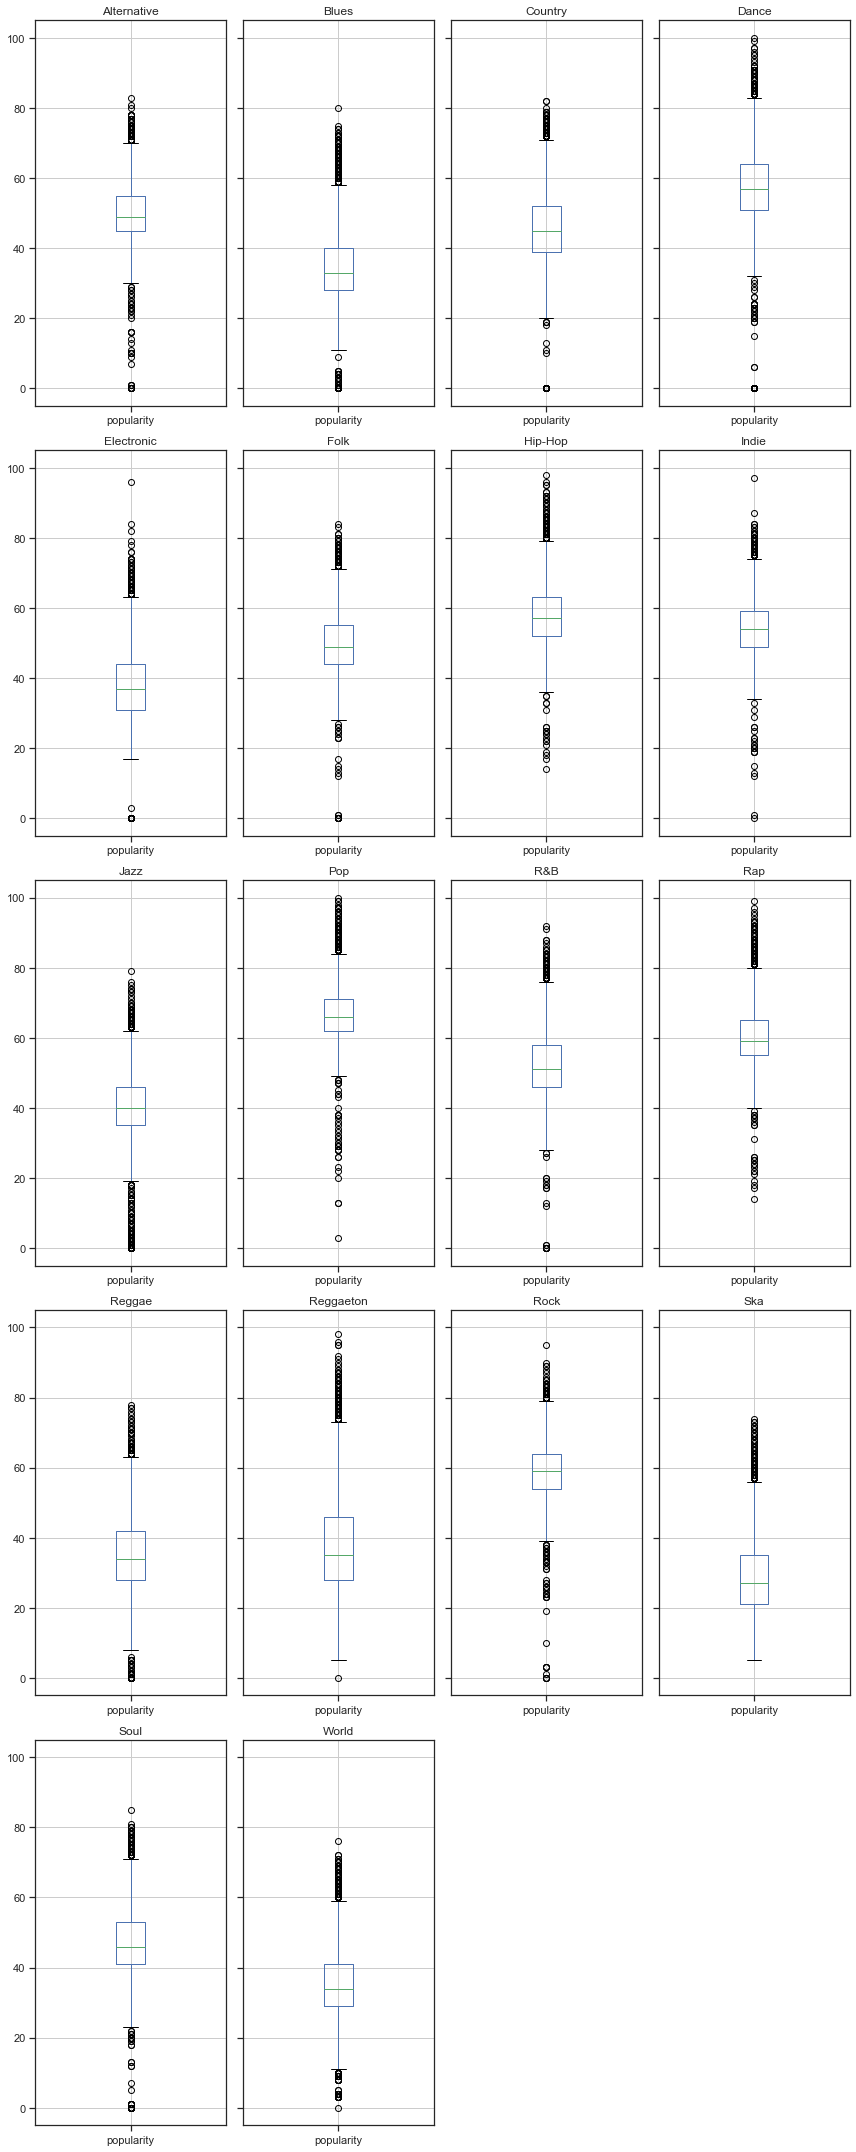

In [5]:
new_data.groupby('genre').boxplot(column=['popularity'], figsize=(12,30))
plt.tight_layout()
fig1 = plt.gcf()
plt.show()

In [6]:
new_data['popularity'].describe()

count    164245.000000
mean         47.542878
std          14.162002
min           0.000000
25%          38.000000
50%          48.000000
75%          58.000000
max         100.000000
Name: popularity, dtype: float64

In [7]:
pop_data_unpop = new_data.loc[new_data['popularity'] < 48]
pop_data_pop = new_data.loc[new_data['popularity'] >= 48]

In [8]:
pop_data_unpop['genre'].value_counts() 
pop_data_unpop_genre = pop_data_unpop.loc[(pop_data_unpop['genre'] == 'Ska') | (pop_data_unpop['genre'] == 'Blues') | 
                                         (pop_data_unpop['genre'] == 'World') | (pop_data_unpop['genre'] == 'Electronic') |
                                         (pop_data_unpop['genre'] == 'Reggae')]

pop_data_pop['genre'].value_counts()
pop_data_pop_genre = pop_data_pop.loc[(pop_data_pop['genre'] == 'Pop') | (pop_data_pop['genre'] == 'Rap') | 
                                         (pop_data_pop['genre'] == 'Rock') | (pop_data_pop['genre'] == 'Hip-Hop') |
                                         (pop_data_pop['genre'] == 'Indie')]

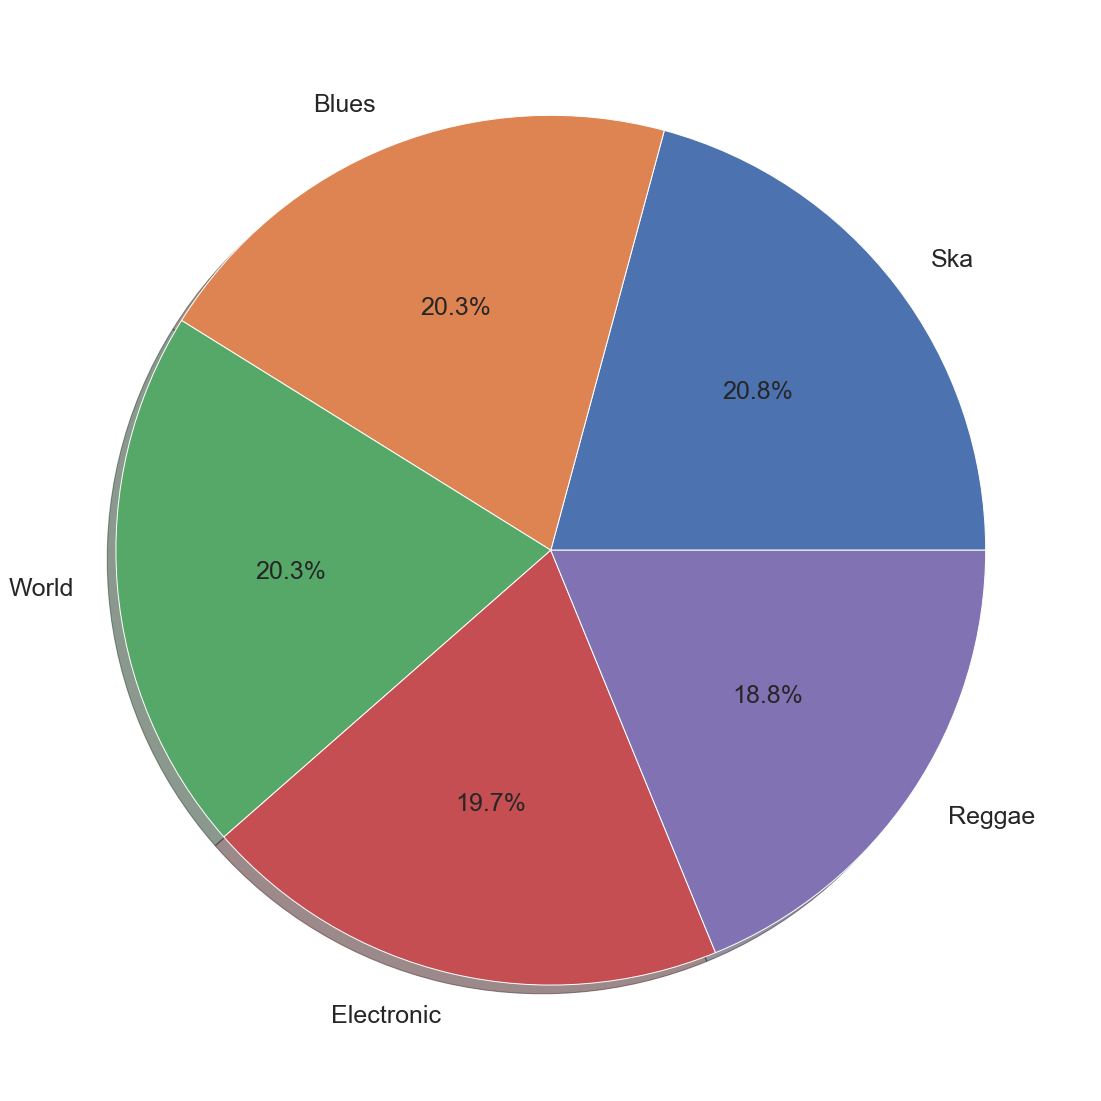

In [9]:
plt.figure(figsize = (20,20))
genre_count_unpop = pop_data_unpop_genre['genre'].value_counts()
genre_names = genre_count_unpop.index
plt.pie(genre_count_unpop,labels=genre_names, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 25})
fig2 = plt.gcf()
plt.show()

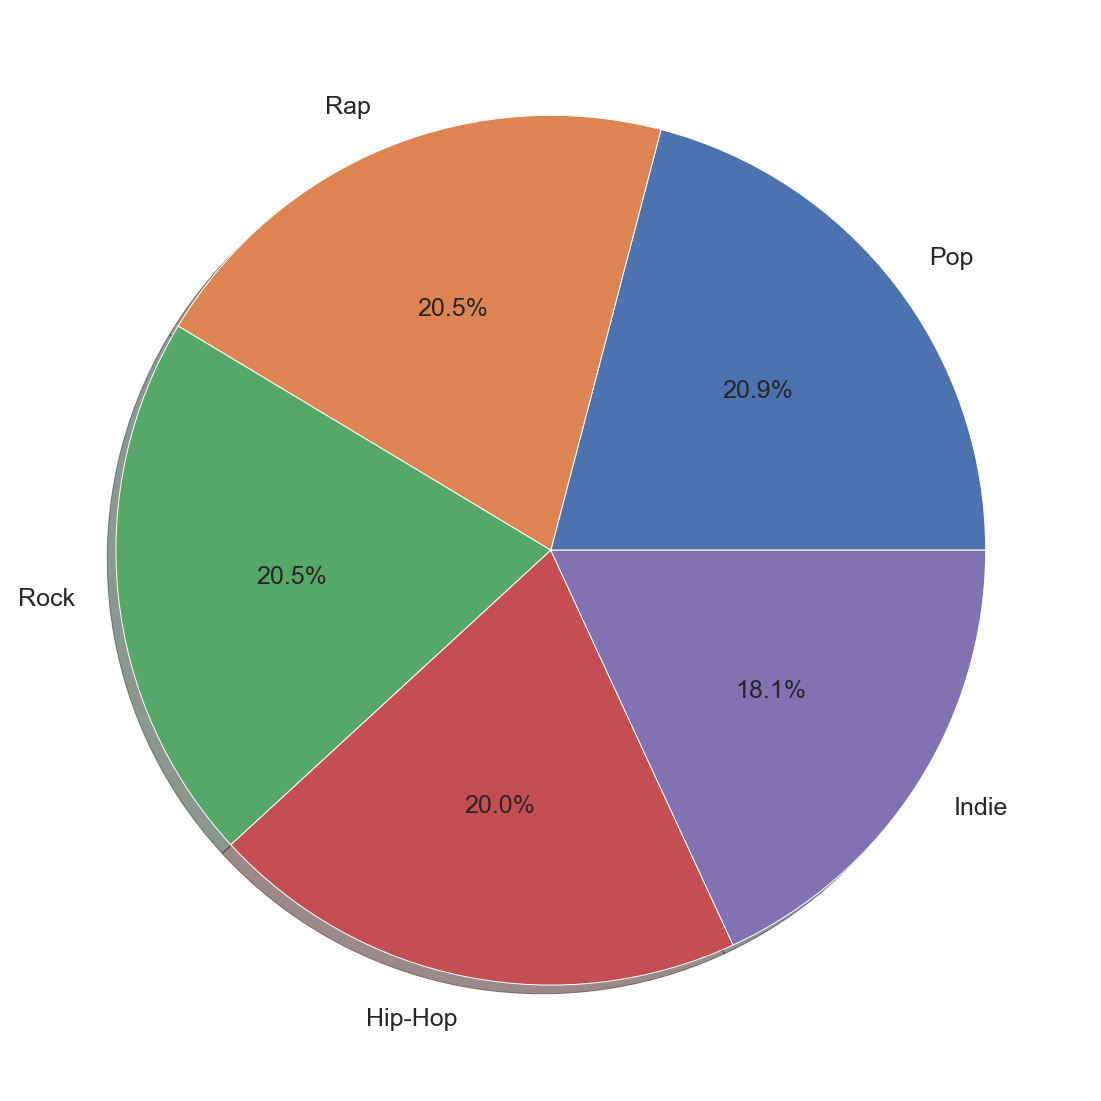

In [10]:
plt.figure(figsize = (20,20))
genre_count_pop = pop_data_pop_genre['genre'].value_counts()
genre_names = genre_count_pop.index
plt.pie(genre_count_pop,labels=genre_names, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 25})
fig3 = plt.gcf()
plt.show()

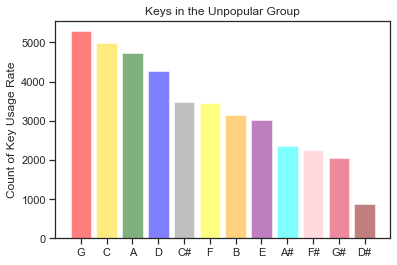

In [11]:
keys_unpop = pop_data_unpop_genre['key'].value_counts()
names = ['G', 'C', 'A', 'D', 'C#', 'F', 'B', 'E', 'A#', 'F#', 'G#', 'D#']
my_colors = ['red', 'gold', 'darkgreen', 'blue', 'grey', 'yellow', 'orange', 'purple', 'aqua', 'lightpink', 'crimson', 'maroon']

plt.bar(names, keys_unpop, align='center', alpha=0.5,color=my_colors)
plt.xticks(names)
plt.ylabel('Count of Key Usage Rate')
plt.title('Keys in the Unpopular Group')
fig4 = plt.gcf()
plt.show()

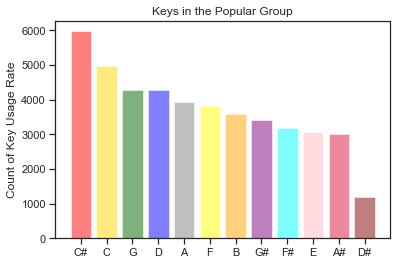

In [12]:
keys_pop = pop_data_pop_genre['key'].value_counts()
names = ['C#', 'C', 'G', 'D', 'A', 'F', 'B', 'G#', 'F#', 'E', 'A#', 'D#']
my_colors = ['red', 'gold', 'darkgreen', 'blue', 'grey', 'yellow', 'orange', 'purple', 'aqua', 'lightpink', 'crimson', 'maroon']

plt.bar(names, keys_pop, align='center', alpha=0.5,color=my_colors)
plt.xticks(names)
plt.ylabel('Count of Key Usage Rate')
plt.title('Keys in the Popular Group')
fig5 = plt.gcf()
plt.show()

# Data Analysis

Now that we have visualized some of the variability in the dataset, we want to see if we can build a model based on the musical characteristics that determine the popularity factor of a song. In order to do so, we decided to start with regression analysis to see what characteristics correlate with popularity across the popular and unpopular groups. We started with some matrix plots and correlation heat map to see where the strongest correlations may be found.

As we can see, there is not much correlation between the popularity score and the musical characteristics but we do want to try to create some simple multiple regression functions to test our hypothesis. Below we created the regression models using the musical characteristics where the correlation coefficient was positive based on the heat maps below. 

We use multiple regression models to help predict outcomes by creating formulas that will pull in the observed data. In our case we want to use the observed musical characteristics to predict the popularity score associated with that song. Based on our analysis we found that the popularity score is not correlated to any of the explanatory variables. Based on our initial hypothesis, we did believe there was a correlation but our findings show that we will need to reject the null hypothesis.

Instead of ending our analysis at this step, we decided to change our approach to find more trends that lead to popularity of a song. We focused our analysis on the the genre of the song instead of the particular musical characteristics that make up the song itself.

We did this by a few different approaches. The first was to develop a new output variable called "Partyability." This variable is made up of a aggregate of a few musical characteristics that are considered popular for popular bar/club songs. This new variable allowed us to determine which genres are well suited to play at a party, club, or bar. 

We also took the approach of using the Billboard top charts to pull info on top #1 songs throughout the last 5 years and compare those songs' genre against our Spotify dataset.

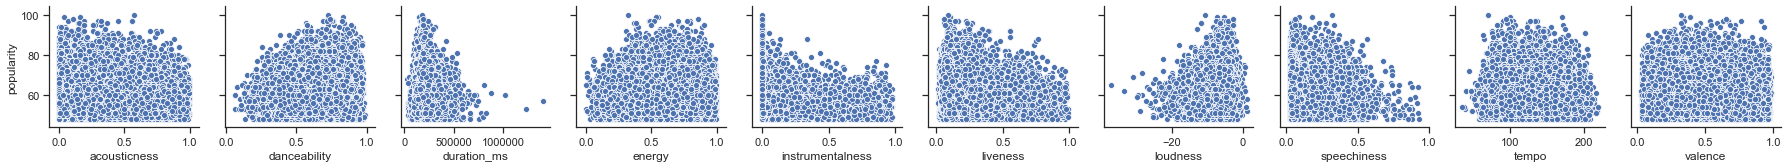

In [13]:
sns_plot_one = sns.pairplot(pop_data_pop_genre,
            x_vars = ['acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness','tempo', 'valence'],
            y_vars = ['popularity'])
sns_plot_one.savefig("Popular_Correlation.png")

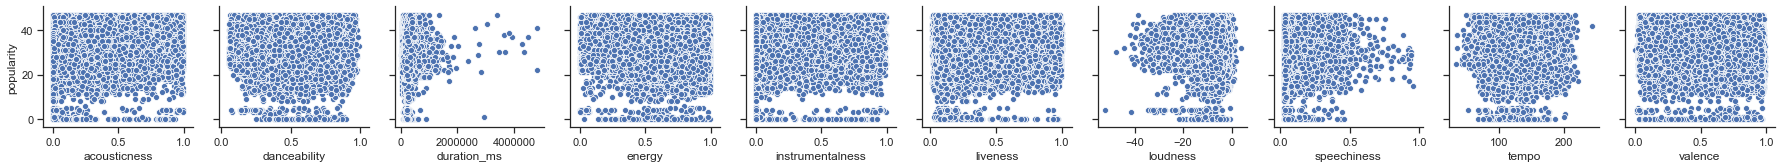

In [14]:
sns_plot_two = sns.pairplot(pop_data_unpop_genre,
            x_vars = ['acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness','tempo', 'valence'],
            y_vars = ['popularity'])
sns_plot_two.savefig("Unpopular_Correlation.png")

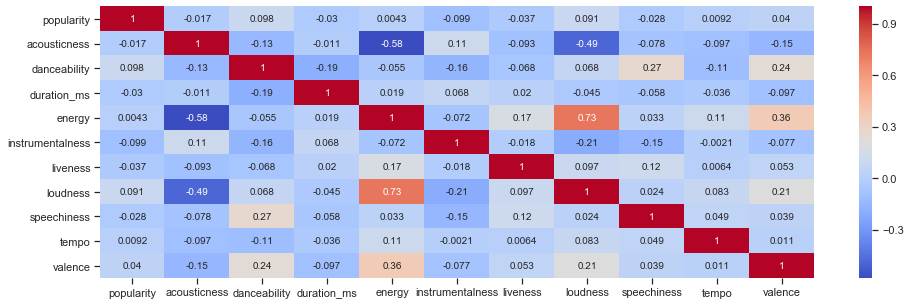

In [15]:
plt.figure(figsize = (16,5))
sns.heatmap(pop_data_pop_genre.corr(), cmap="coolwarm", annot=True)
fig6 = plt.gcf()
plt.show()
fig6.savefig('Popular_Heat.png', dpi=100)

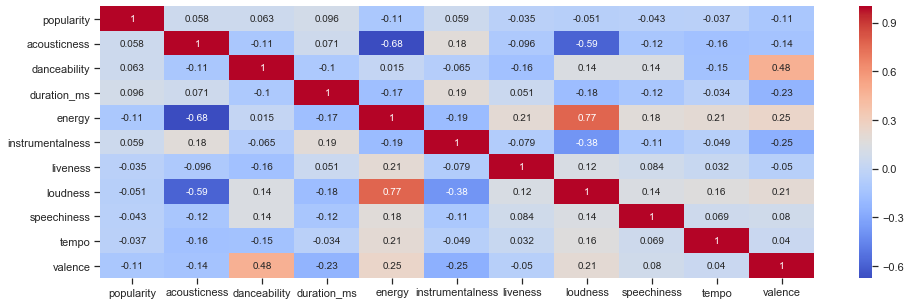

In [16]:
plt.figure(figsize = (16,5))
sns.heatmap(pop_data_unpop_genre.corr(), cmap="coolwarm", annot=True)
fig7 = plt.gcf()
plt.show()
fig6.savefig('Unpopular_Heat.png', dpi=100)

In [17]:
X = pop_data_pop_genre[['danceability','energy', 'loudness','tempo', 'valence']]
Y = pop_data_pop_genre['popularity']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 64.36855230913588
Coefficients: 
 [ 3.74188866e+00 -5.85320486e+00  4.89983918e-01  4.70539685e-03
  1.20277286e+00]


In [18]:
X = pop_data_unpop_genre[['acousticness','danceability', 'duration_ms','instrumentalness']]
Y = pop_data_unpop_genre['popularity']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 27.90755753101906
Coefficients: 
 [1.51245569e+00 3.76743683e+00 5.77443604e-06 9.92881677e-01]


# Partybility 

According to Denis’ analysis, Pop, Rap, Rock, Hip-Hop, Dance, Indie, R&B, & Alternative were the top 8 most popular genres. As part of our overall analysis, we analyzed which of these top genres would be ideal for a party setting. Tracks played at parties, should be popular, easy to dance to, lively, loud, and upbeat. We refer to these characteristics as a track’s ‘partybality’. Thus, we made a new, calculated partybality column. We determined a genre’s ‘partybility’ by first calculating each respective genre’s averages for popularity score, danceability score, energy score, loudness (decibels), and tempo (BPM).
Then we added the all the average scores to calculate each genre’s partibility.

In [19]:
#Read Data
spotify_data = pd.read_csv("../Resources/SpotifyFeatures.csv")

# Read in 6 needed columns into data frame
slapability_data = spotify_data[["genre", "popularity", "danceability", "energy", "loudness","tempo"]]

In [20]:
#Group by genre
grouped_genre = slapability_data.groupby(['genre'])
grouped_genre

#Obtain averages of popularity, danceability, energy, loudness, tempo
avg_groups = grouped_genre.mean()

In [21]:
#Get data with loc
top_genres_data = avg_groups.loc[["Pop", "Rap", "Rock","Hip-Hop", "Indie", "Dance", "R&B", "Alternative"],
                                    ["popularity","danceability", "energy", "loudness","tempo"]]
#Display
top_genres_data

,popularity,danceability,energy,loudness,tempo
genre,,,,,
Pop,66.590667,0.640236,0.642208,-6.495423,121.175844
Rap,60.533795,0.697244,0.650520,-6.669916,121.100808
Rock,59.619392,0.538292,0.683670,-7.285875,122.629630
Hip-Hop,58.423131,0.718808,0.643275,-6.860286,120.791039
Indie,54.701561,0.566821,0.581002,-7.915142,119.290814
Dance,57.275256,0.638191,0.698067,-6.054241,120.795919
R&B,52.308719,0.642125,0.564248,-7.597064,116.373834
Alternative,50.213430,0.541898,0.711519,-6.540803,122.534485


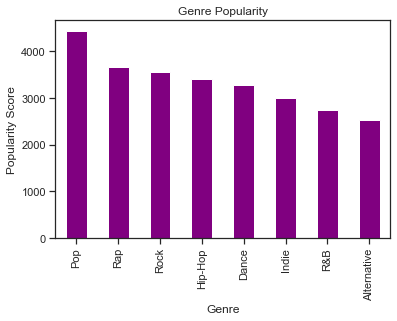

<Figure size 432x288 with 0 Axes>

In [22]:
#Generate and calculate 'partybility column'
partybility = top_genres_data["popularity"] + top_genres_data["danceability"] + top_genres_data["energy"] + top_genres_data["loudness"] + top_genres_data["tempo"]
top_genres_data["partybality"] = partybility

#display
top_genres_data

#Build popularity date frame

#Square popularity data to highlight the genre's differences
popularity_df = top_genres_data['popularity']**2
popularity_df = popularity_df.sort_values(ascending=False)
popularity_chart = popularity_df.plot(kind='bar', stacked=True, color='purple')

#Set the xlabel and ylabel using class methods
popularity_chart.set_xlabel("Genre")
popularity_chart.set_ylabel("Popularity Score")
popularity_chart.set_title("Genre Popularity")

#Save and display chart
plt.show()
plt.tight_layout()

Popularity: Let’s start with analyzing each genre’s popularity score. The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by an algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. The top 8 genres average popularity score ranged from 50 to 65. When we were analyzing each Genre’s average popularity, we decided to square each genre’s average popularity score to highlight the differences. As you can see, unsurprisingly, Pop is the most popular genre, followed by Rap and Rock.

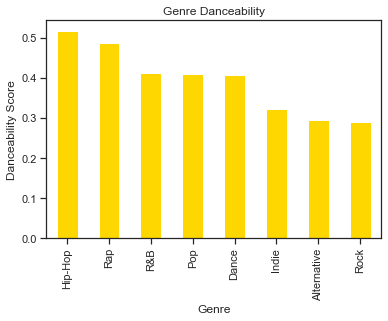

<Figure size 432x288 with 0 Axes>

In [23]:
#Build danceability data frame

#Square danceability data to highlight the genre's differences
danceability_df = top_genres_data['danceability']**2
danceability_df = danceability_df.sort_values(ascending=False)
danceability_chart = danceability_df.plot(kind='bar', stacked=True, color='gold')

#Set the xlabel and ylabel using class methods
danceability_chart.set_xlabel("Genre")
danceability_chart.set_ylabel("Danceability Score")
danceability_chart.set_title("Genre Danceability")

#Save and display chart
plt.show()
plt.tight_layout()

Danceability: Moving on to danceability. Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. The top 8 genres average danceability score ranged from 0.53 to 0.72. Just as in our popularity analysis, we squared each genre’s average popularity score to highlight the differences. Hip-Hop is the genre with the highest danceability, followed by Rap and R&B. It is interesting that the ‘Dance’ genre danceability score was in the middle of the pack. This could be because Dance music tends to lack rhythm stability and overall regularity, which are key elements of the danceability score. 


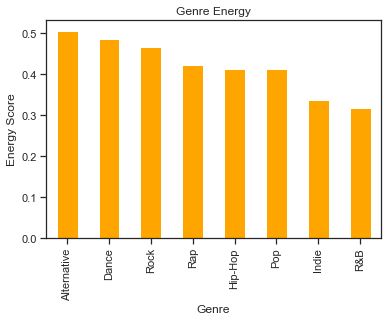

<Figure size 432x288 with 0 Axes>

In [24]:
#Build energy data frame

#Square energy data to highlight the genre's differences
energy_df = top_genres_data['energy']**2
energy_df = energy_df.sort_values(ascending=False)
energy_chart = energy_df.plot(kind='bar', stacked=True, color='orange')

#Set the xlabel and ylabel using class methods
energy_chart.set_xlabel("Genre")
energy_chart.set_ylabel("Energy Score")
energy_chart.set_title("Genre Energy")

#Save and display chart
plt.show()
plt.tight_layout()

Energy: Now on the energy analysis, like the danceability score, the energy score is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Perceptual features contributing to this attribute include dynamic range, timbre, and perceived loudness. For example, a death metal song would have a high energy score, while a Bach prelude scores low on the scale. The top 8 genres average energy score ranged from 0.56 to 0.71. We also squared each genre’s average energy score to highlight the differences. Alternative is the genre with the highest energy score, followed by Dance and Rock. This make sense because Alternative and Rock music tend to have wide dynamic ranges and high timbre. It also makes sense that the Dance genre had the second highest energy score because high perceived loudness is a significant element of Dance music.  


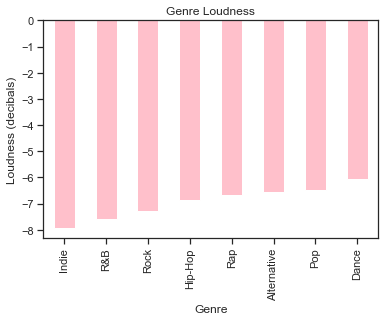

<Figure size 432x288 with 0 Axes>

In [25]:
#Build loudness data frame

#Do not square value because loudness is in decibals
loudness_df = top_genres_data['loudness'].sort_values()
loudness_chart = loudness_df.plot(kind='bar', stacked=True, color='pink')

#Set the xlabel and ylabel using class methods
loudness_chart.set_xlabel("Genre")
loudness_chart.set_ylabel("Loudness (decibals)")
loudness_chart.set_title("Genre Loudness")

#Save and display chart
plt.show()
plt.tight_layout()

Loudness: We also analyzed each genre’s loudness score in decibels. The overall loudness of a track in decibels (dB) directly correlates with track’s average amplitude. Amplitude measures the physical strength of sound. The closer a track’s is to 0 db, the louder it is. The top 8 genres average loudness ranged from -7.9 (db) to -6 (db). We did not square each genre’s average loudness score because this attribute is objectively measured in decibels, instead of being algorithmically calculated by Spotify. Dance is the loudest genre. This make sense because, as mentioned before, dance music has high perceived loudness. Conversely, Indie is the least loud genre due to it having a low perceived loudness. 


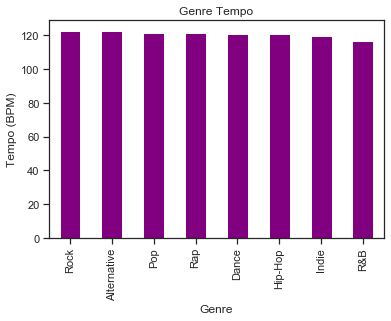

genre
Rock           122.629630
Alternative    122.534485
Pop            121.175844
Rap            121.100808
Dance          120.795919
Hip-Hop        120.791039
Indie          119.290814
R&B            116.373834
Name: tempo, dtype: float64

<Figure size 432x288 with 0 Axes>

In [26]:
#Build tempo data frame

#Do not square value because tempo is in BPM

tempo_df = top_genres_data['tempo'].sort_values(ascending = False) 
tempo_chart = tempo_df.plot(kind='bar', stacked=True, color='purple')

# Set the xlabel and ylabel using class methods
tempo_chart.set_xlabel("Genre")
tempo_chart.set_ylabel("Tempo (BPM)")
tempo_chart.set_title("Genre Tempo")

plt.show()
plt.tight_layout()
tempo_df

Tempo: Here, we looked at each Genre’s average tempo. Tempo is the speed or pace of a given track and derives directly from the track’s average beat duration. Tempo is measured in BPM (beats per minute). So, the higher the BPM, the faster a song’s pace. Musically, if a piece is 120-160 BPM, it is considered Allegro, which means the piece is fast and cheerful. The top 8 genres average tempo did not vary significantly from each other. The top 8 were all around 120 BPM. So, it is safe to say that these genres generally have upbeat, fast-paced tracks, which are ideal for a party setting. 


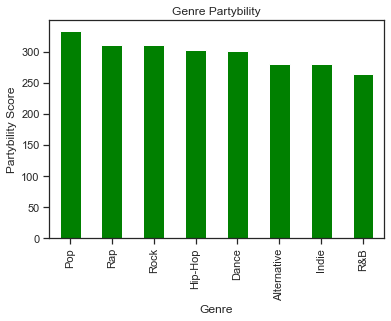

<Figure size 432x288 with 0 Axes>

In [27]:
#Build partybility data frame
#Divide by 10 and square the partybality values to highlight the difference. 
partybality_df = top_genres_data['partybality']/10
partybality_adjusted = partybality_df**2
partybality_adjusted = partybality_adjusted.sort_values(ascending = False) 
partybality_chart = partybality_adjusted.plot(kind='bar', stacked=True, color='green')

#Set the xlabel and ylabel using class methods
partybality_chart.set_xlabel("Genre")
partybality_chart.set_ylabel("Partybility Score")
partybality_chart.set_title("Genre Partybility")

#Save and display chart
plt.show()
plt.tight_layout()

Finally, we have the results after adding all the attributes’ average scores to calculate each genre’s partibility. We divided each genre’s partibility popularity score by 10 and then squared the results to highlight the differences. We decided to divide the score by 10 so that the squared results wouldn’t be too large. From this analysis, we determined that Pop is the best genre in a party setting, followed by Rap and rock. The results were very similar to the popularity score results. Both had Pop, Rap, and Rock at the top of the pack while Indie, R&B and Alternative were at the bottom. We can conclude that in a party setting, it is safe to go with the most popular genres at the time. 


# BILLBOARD HOT-100 (TOP SONGS RANK THROUGH TIME 2014-2019)

Using Billboard's Hot-100 chart we have created three graphs that exhibit a songs rank through time. With a clean dataset already provided, we used a function to find songs that were ranked No.1, groupby the songs to 'artist' and 'title' and plotted multiple songs into a graph that ranged from 2014-2019. Our goal here was to see which songs stayed at No.1 the longest and which genre dominated the charts in relation to popularity. 

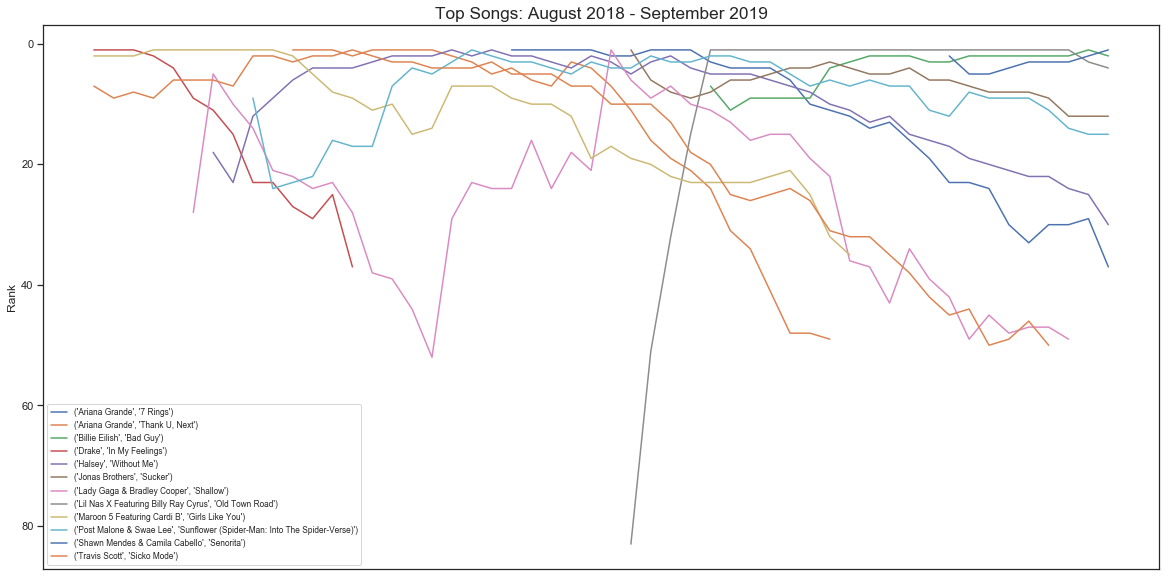

In [28]:
#Dependencies
from matplotlib import dates as plt_dates

#Read in CSV
bb1_csv = '../Resources/billboard_1_year.csv'
bb3_csv = '../Resources/billboard_3_year.csv'
bb5_csv = '../Resources/billboard_5_year.csv'
bb1_df = pd.read_csv(bb1_csv)
bb3_df = pd.read_csv(bb3_csv)
bb5_df = pd.read_csv(bb5_csv)

#Defining a function to look for songs ranked #1
def single(df):
    try:
        if (df['rank'].isin([1]).any()):
            return df
    except KeyError:
        return None

#Transform date column to number (specifically unix time for readable graph)
bb1_df['date'] = bb1_df['date'].transform(plt_dates.datestr2num)

#Groupby artist and title in order to determine groups
gb_songtitle = bb1_df.groupby(['artist','title'])
wasrankone_df = gb_songtitle.apply(single)
wasrankone_df = wasrankone_df.dropna()
wasrankone_df = wasrankone_df.groupby(['artist','title'])

#Plotting songs for Top Songs in Aug 2018 - Sep 2019
plt.figure(figsize=(20,10))
for key, df in wasrankone_df:
    plt.plot(df['date'], df['rank'], label=key)
    
plt.legend(fontsize='small')
plt.gca().invert_yaxis()
plt.title('Top Songs: August 2018 - September 2019', fontsize='xx-large')
plt.xticks([], [])
plt.ylabel('Rank')

#Display chart
plt.show()

ANALYSIS: In this graph we observe 12 songs and its movement from its starting position on the Hot-100 chart until it exits the chart. We see that most of the top songs stay between rank 1 and high 40s. For Drake's 'In My Feelings' the song had a strong start but plummeted from its No.1 spot pretty quickly. As for 'Old Town Road,' the song entered the billboard charts from a low ranking and quickly reached No.1 and remained there for 19 weeks. 'Old Town Road' is considered a mix of two genres country and hip-hop.

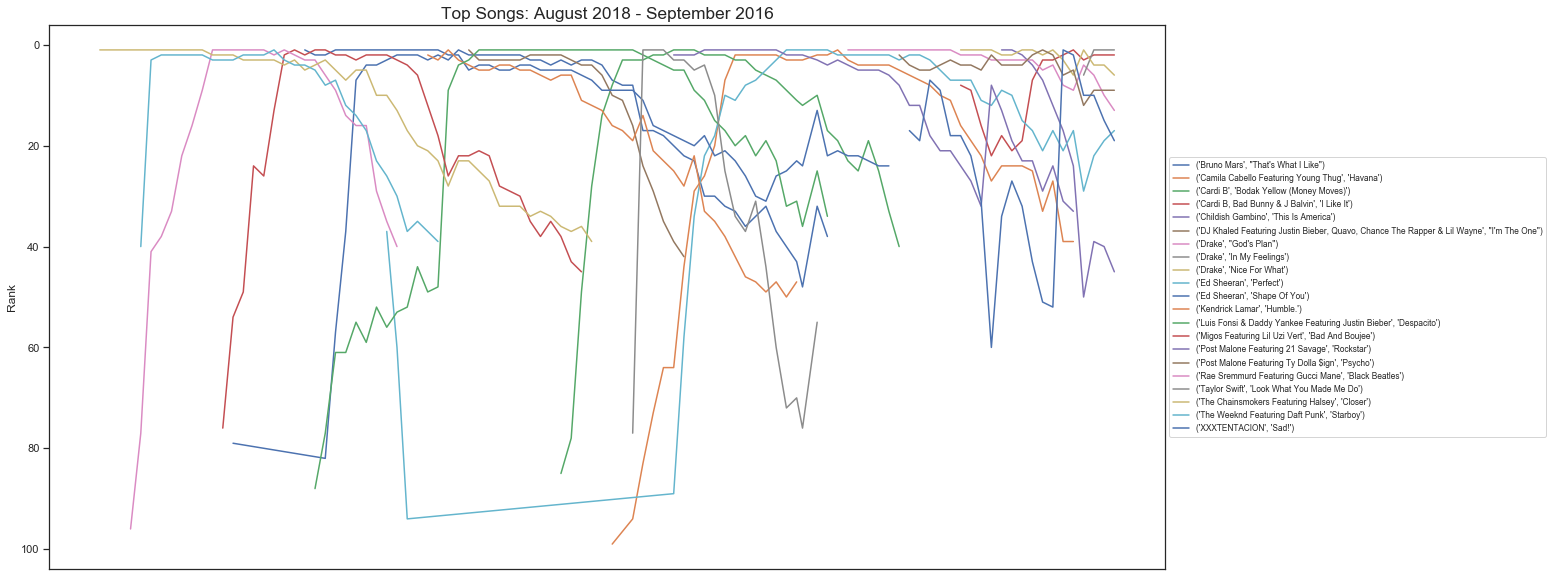

In [29]:
# 3 Year dataset (extract specific dates)
bb3_df = bb3_df[(bb3_df['date'] > '2016-09-01') & (bb3_df['date'] < '2018-08-05')]
bb3_df = pd.DataFrame(bb3_df)

#Transform date column to number (specifically unix time for readable graph)
bb3_df['date'] = bb3_df['date'].transform(plt_dates.datestr2num)

#Groupby artist and title in order to determine groups
gb_songtitle = bb3_df.groupby(['artist','title'])
rankone_df = gb_songtitle.apply(single)
rankone_df = rankone_df.dropna()
rankone_df = rankone_df.groupby(['artist','title'])

#Plotting songs for Top Songs in Aug 2016 - Sep 2018
plt.figure(figsize=(20,10))
for key, df in rankone_df:
    plt.plot(df['date'], df['rank'], label=key)

plt.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().invert_yaxis()
plt.title('Top Songs: August 2018 - September 2016', fontsize='xx-large')
plt.xticks([], [])
plt.ylabel('Rank')

#Display chart
plt.show()

ANALYSIS: This graph displays the top songs for the course of 2 years. Due to its longer year range, there are more top songs that can be observed. Most of these songs are categorized in the pop, rap and hip-hop genre (particularly in this graph most songs are either rap/hip-hop). 'Despacito'(genre: latin pop) stayed at No.1 the longest compared to other songs. Ed Sheeran's 'Perfect', began in the low 40s, plummeted to high 90s but suddenly climbed back up and stayed at the No.1 spot for 6 weeks.

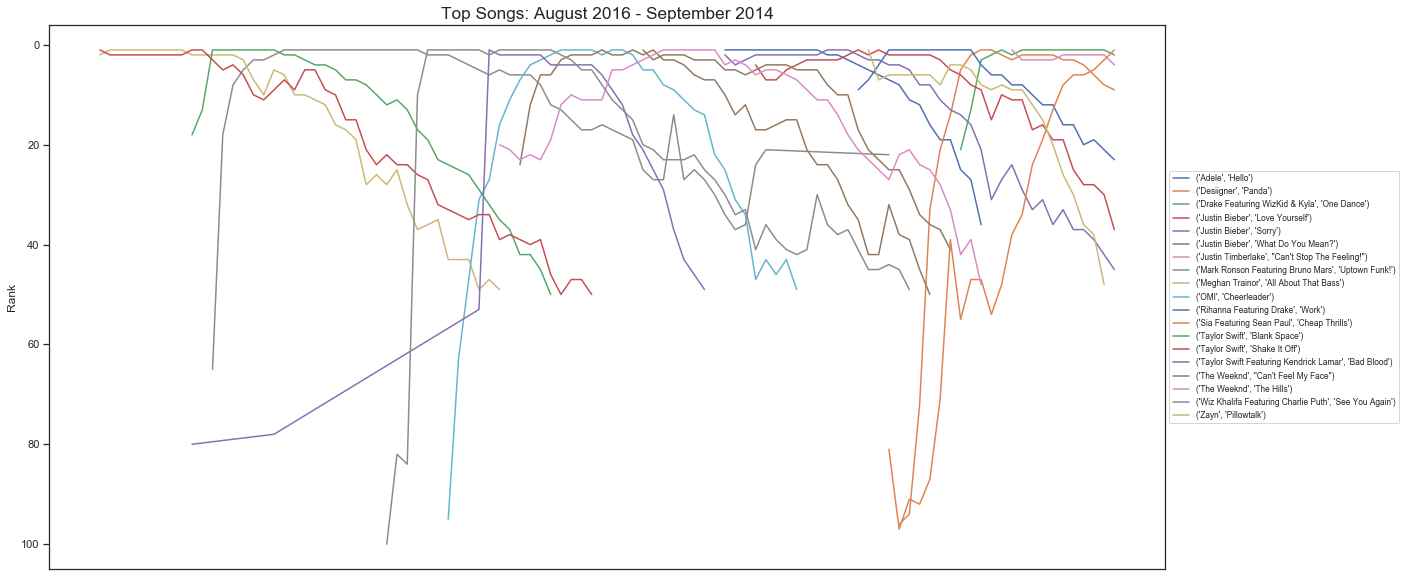

In [30]:
#5 Year Dataset (extract specific dates)
bb5_df = bb5_df[(bb5_df['date'] > '2014-09-05') & (bb5_df['date'] < '2016-08-10')]
bb5_df = pd.DataFrame(bb5_df)

#Transform date column to number (specifically unix time for readable graph)
bb5_df['date'] = bb5_df['date'].transform(plt_dates.datestr2num)

#Groupby artist and title in order to determine groups
gb_songtitle = bb5_df.groupby(['artist','title'])
rankone5_df = gb_songtitle.apply(single)
rankone5_df = rankone5_df.dropna()
rankone5_df = rankone5_df.groupby(['artist','title'])

#Plotting songs for Top Songs in Aug 2014 - Sep 2016
plt.figure(figsize=(20,10))
for key, df in rankone5_df:
    plt.plot(df['date'], df['rank'], label=key)
    
plt.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().invert_yaxis()
plt.title('Top Songs: August 2016 - September 2014', fontsize='xx-large')
plt.xticks([], [])
plt.ylabel('Rank')

#Display chart
plt.show()

ANALYSIS: In this graph we see again another shift in top charting genres. There are more hip-hop and pop songs in this graph rather than the previous one that leaned more towards rap and hip-hop. Zayn's 'Pillowtalk' debuted at No.1 but quickly descended after one week. However, 'Pillowtalk' is not within the usual pop/rap/hip-hop genre. It is categorized as Alternative R&B and electronic. 'Uptown Funk' was the longest song in the No.1 spot even with its mix of funk and pop genre. It got replaced with 'See You Again' which is categorized as a mix of the pop and rap genre.

CONCLUSION: From the 3 graphs obtained from Billboard's Hot-100 chart, it is evident that Pop, Hip-Hop and Rap are the most dominating genres throughout 2014-2019. However, it is undeniable that Pop is the top genre for all 5 years. This confirms our spotify popular genre analysis that exhibit Pop as the leading genre with a 20.9% score. Hip-hop and Rap follow behind with 20% and 20.5%.

# Billboard Analysis - Average Length of Rank 1

Using the `billboard.py` wrapper, we consolidated 1 year, 3 years, and 5 years worth of weekly "Hot 100" charts into csv's containing each chart's top 100 songs and their rankings. Since each chart is ordered by, or can be grouped by, date, we will be making pycharts that dig deep into the highly sought after Rank 1. In this iPython Notebook, we will be analyzing the distribution of the lengths of time that songs are ranked 1.

Combined below are three plots: a distribution for a song's ranking as number 1 over one year and five years by weeks and a histogram describing the normality of the 5 year plot.

The distribution in the first plot describes the 12 songs most popular in the past year and shows us how popular those 12 songs were relative to each other. The most popular song of the year, "Old Town Road" by Lil Nas X, was the most popular song of the past year. Outside reading shows that this song broke records as it stayed number 1 on the charts for 19 straight weeks. However, as a song that broke records, it is a clear outlier in the first year.

The distribution in the second plot describes the past 5 years in a similar way, but with much more data. With 51 data points, we can see the clear bundling of songs around 5 weeks, the mean of the data. Note the difference in the means between 1-year data and 5-year data, around 15%. The 5-year data was definitely has less spread than the 1-year data, but that decreased spread raised the mean by a small percentage. Further statistical analysis can reveal which points are outliers, but for that we need to test for normality.

The last plot tests for normality over the past five years by binning each result by week. We expect to see a bell curve set up around 5 weeks. However, we can clearly see our data is not normal. The orange line indictes an exponential regression to fit the data, and though it fits the best, it does not accurately describe our data. Normality in events tends to be the result of randomness or through slight perturbations in initial conditions. Our data is skewed because it is biased. Song popularity is complex, and what is lasting is dependent on the people listening. 

# 1-year and 5-year Scatter plots and 5-year Histogram

In [31]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.optimize import curve_fit
import numpy as np

%matplotlib inline

# Import billboard data

charts_1 = pd.read_csv("./Resources/billboard_1_year.csv") # 1 Year data
charts_3 = pd.read_csv("./Resources/billboard_3_year.csv") # 3 Year data
charts_5 = pd.read_csv("./Resources/billboard_5_year.csv") # 5 Year data

# Function Definitions

def exp_reg(x,a,b):
    return a*np.exp(-b*x)

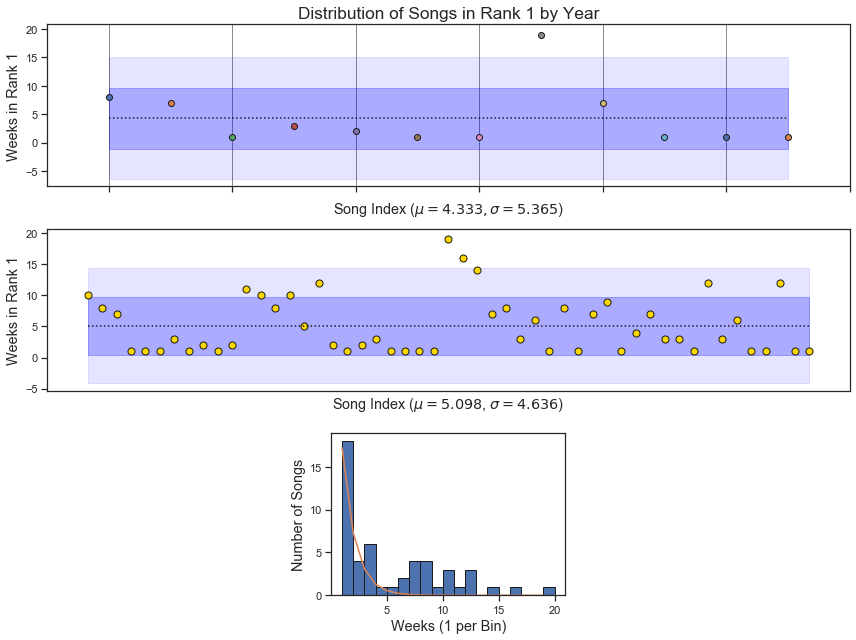

In [32]:
### Plotting ###

fig = plt.figure(figsize=(12,9))
gs = fig.add_gridspec(3,3)
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])
ax3 = fig.add_subplot(gs[2,1])

## ax1 - year 1 demo ##

    # Group-by rank, then get group for rank 1 ("1")
charts_1_gb = charts_1.groupby("rank")
rankone_1 = charts_1_gb.get_group(1)

    # Define group-by for artist and title for rankone_1
rankone_1_gb = rankone_1.groupby(['artist', 'title'])

    # Calculate the amount of weeks each artist-title pair has via count()
rankone_1_frac = rankone_1_gb.count().reset_index().drop(columns=['Unnamed: 0'])

    # Mean and Std Deviation
weeks_bar = rankone_1_frac['weeks'].mean()
sigma = rankone_1_frac['weeks'].std()

ax1.hlines(y=weeks_bar,xmin=0, xmax=11, ls="dotted") # Mean
ax1.fill_between(x=np.arange(12), y1=weeks_bar-2*sigma, y2=weeks_bar+2*sigma, color='blue', alpha=.10)
ax1.fill_between(x=np.arange(12), y1=weeks_bar-sigma, y2=weeks_bar+sigma, color='blue', alpha=.25)

    # Labels and Plots
labels = []
for t in rankone_1_frac.itertuples():
    ax1.scatter(x=[t[0]], y=[t[4]], edgecolor='k')
    labels.append(f"{t[2]}")

labels[9] = 'Sunflower'

ax1.set_xlim((-1,12))
ax1.set_xticklabels([])
ax1.grid(axis='x', alpha=.5, color='k')

ax1.set_ylabel("Weeks in Rank 1", fontsize="x-large")
ax1.set_xlabel(f"Song Index ($\mu = {weeks_bar:.3f}, \sigma = {sigma:.3f}$)", fontsize='x-large')

## ax2 - 5 year demo ##

    # Group-by rank, pull 1
rankone_5 = charts_5.groupby('rank').get_group(1)

    # Group-by (artist,title): count weeks
rankone_5 = rankone_5.groupby(['artist', 'title']).count()

    # x_axis values
x5 = np.arange(rankone_5['weeks'].size)

    # y_axis values
percents_5 = rankone_5['weeks'].to_numpy()

    # Mean and std deviation
rank_mu = rankone_5['weeks'].mean()
rank_sigma = rankone_5['weeks'].std()

    # Standard deviation
ax2.hlines(y=rank_mu ,xmin=0, xmax=np.amax(x5), ls="dotted")
ax2.fill_between(x=x5, y1=rank_mu-2*rank_sigma, y2=rank_mu+2*rank_sigma, color='blue', alpha=.10)
ax2.fill_between(x=x5, y1=rank_mu-rank_sigma, y2=rank_mu+rank_sigma, color='blue', alpha=.25)

    # Plotting
ax2.scatter(x5, percents_5, edgecolor='k', label='Year 4-5', color='gold', s=50)

ax2.set_xlabel(f'Song Index ($\mu = {rank_mu:.3f}$, $\sigma = {rank_sigma:.3f}$)', size='x-large')
ax2.set_ylabel('Weeks in Rank 1', size='x-large')
ax2.set_xticks([])
ax2.grid(axis='x', alpha=.5, color='k')

## ax3 - histogram demo ##

    # Histogram
n, bins, patches = ax3.hist(percents_5, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], edgecolor='k')
    
    # Regression
x = np.arange(1,20,1)
popt, pcov = curve_fit(exp_reg, x, n)

ax3.plot(x, exp_reg(x, *popt))
ax3.set_xlabel("Weeks (1 per Bin)", fontsize='x-large')
ax3.set_ylabel("Number of Songs", fontsize='x-large')

# Final plt.show() and savefig()
ax1.set_title("Distribution of Songs in Rank 1 by Year", fontsize='xx-large')
plt.tight_layout()

plt.show()

# Conlcusions


Our analysis of our Spotify Dataset and Billboard Data left us with 4 lasting impressions:
We cannot base a song’s popularity based on acoustic features.
Our classification of Partyability generated some promise in using acoustic features to categorize songs.
Billboard ‘Hot-100’ charts tell us Pop, Hip-Hop, and Rap were the most popular genres in the past 5 years.
On average a song is ranked 1 for 5 weeks. Most songs last 1-2 weeks ranked 1. Few songs are popular for more than couple months. 